# Creating, saving, and loading an individual task

### Imports

In [1]:
import sys
sys.path.append('../')

from wisdom import make
from wisdom import read_write
from wisdom.envs.shapenet.task_generator import TemporalTask
import wisdom.envs.shapenet.registration as env_reg
import wisdom.envs.shapenet.task_generator as tg

### Environment

In [3]:
stim_dir = '../data/shapenet_handpicked'

# Create environment
env = make(
    env_id='ShapeNet',
    dataset_fp=stim_dir
)

# Initialize environment
print(env.env_spec.auto_gen_config)

{'op_dict': {'Select': {'n_downstream': 4, 'downstream': ['GetLoc', 'GetCategory', 'GetObject'], 'same_children_op': False, 'min_depth': 1, 'min_op': 1}, 'GetCategory': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'GetLoc': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'GetObject': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'IsSame': {'n_downstream': 2, 'downstream': ['GetLoc', 'GetCategory', 'GetObject', 'CONST'], 'sample_dist': [0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2], 'same_children_op': True, 'min_depth': 3, 'min_op': 7}, 'NotSame': {'n_downstream': 2, 'downstream': ['GetLoc', 'GetCategory', 'GetObject', 'CONST'], 'sample_dist': [0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2], 'same_children_op': True, 'min_depth': 3, 'min_op': 7}, 'And': {'n_downstream': 2, 'downstream': ['IsSame', 'NotSame', 'And', 'Or'], 'same_children_op': False, 'min_de

### Task Creation

- Here we create a task where the goal is to correctly compare the locations of two stimuli (objects)
    - We use the TemporalTask class as a parent class to build from. (All custom tasks must inherit from this TemporalTask)

In [4]:
class CompareLocTemporal(TemporalTask):
    """
    Compare objects on chosen frames are of the same location or not.
    @param: whens: a list of two frame names to compare stimuli location between
    """

    def __init__(self, whens, first_shareable=None):
        # Initialize Class with parent class
        super(CompareLocTemporal, self).__init__(whens=whens, first_shareable=first_shareable)

        # Get the whens
        when1, when2 = self.whens[0], self.whens[1]

        # Select the specified frames
        objs1 = tg.Select(when=when1)
        objs2 = tg.Select(when=when2)

        # Get the locations of stimuli within each frame
        a1 = tg.GetLoc(objs1)
        a2 = tg.GetLoc(objs2)
        
        # Set operator to check if they're the same location
        self._operator = tg.IsSame(a1, a2)

        # Set the number of frames
        self.n_frames = env_reg.compare_when([when1, when2]) + 1

- Define the whens and create enstantiate the comparison task object
    - Here we define the whens such that the objects in frame 0 and 4 are compared by location

In [8]:
whens = ['last0', 'last4']
comp_loc_task = CompareLocTemporal(whens)

- Save the task as a json file

In [9]:
read_write.write_task(comp_loc_task, 'outputs/tasks/comp_loc_task.json')

- Reinstantiate task from json file

In [10]:
comp_loc_task = tg.read_task('outputs/tasks/comp_loc_task.json')

- Visualize the graph network of the task
    - To visualize the graph we must first get the graph object from the task object

In [11]:
G = comp_loc_task.to_graph()
comp_loc_task.draw_graph('outputs/tasks/comp_loc_task_.png', G)

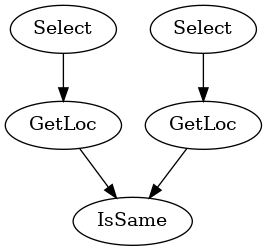

In [12]:
from IPython.display import Image
Image('outputs/tasks/comp_loc_task_.png')